# **TASK 2: Prediction Using Unsupervised ML**

Aim: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Author: Pramit Bhatia

# Data Preprocessing

## Importing the libraries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [129]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Removing Species Column, as We Need to Predict The Clusters.**<br>
**Removing ID Column, as it is unique and will not affect our model.**

In [130]:
df.drop('Species', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

## Checking For Missing Values / Duplicates

In [131]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [132]:
df[df.duplicated()].any()

SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
dtype: bool

**No missing values, No duplicates.**

## Correlation Analysis

In [133]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Data Visualization

**Heatmap:**

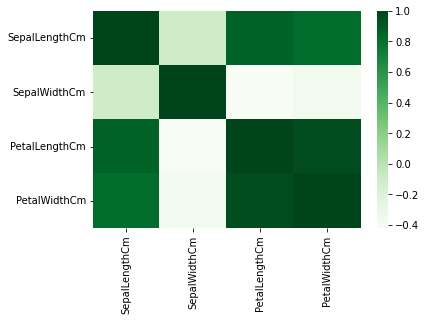

In [134]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='Greens')

**Histogram:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f733dbe5410>,
      dtype=object)

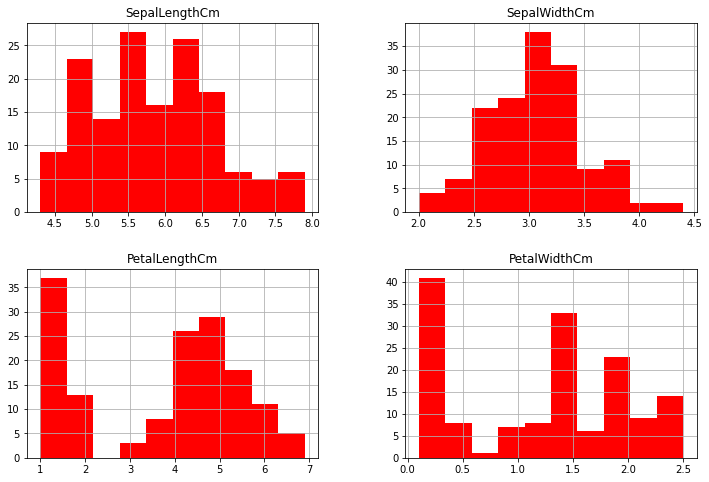

In [135]:
df.hist(figsize =(12,8), color='red')

##We will implement clustering using K-Means Clustering

**Using the elbow method to find the optimal number of clusters k**

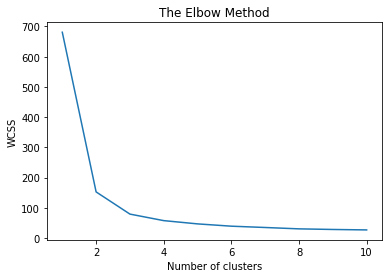

In [136]:
from sklearn.cluster import KMeans
x = df.iloc[:, [0, 1, 2, 3]]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [137]:
pd.DataFrame({"Number of Clusters (k)":range(1,11),"Distortion":wcss})

,Number of Clusters (k),Distortion
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.930963
6,7,34.598978
7,8,30.085308
8,9,28.063275
9,10,26.587317


**Therefore, we choose optimum number of clusters as 3.**

## Training the K-Means model on the dataset

In [138]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

## Visualizing Results

In [139]:
kmeans.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

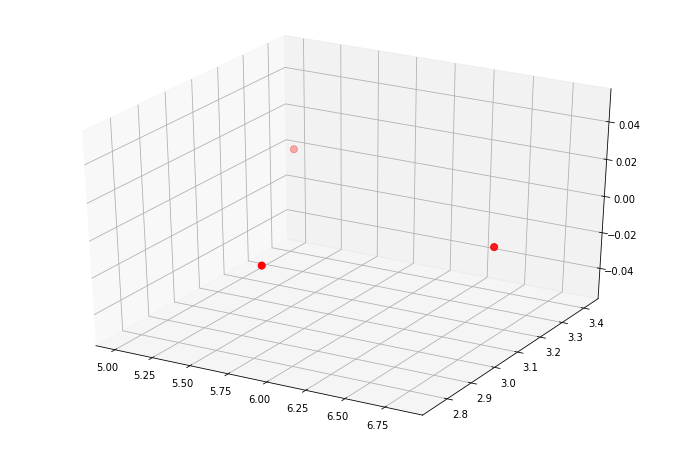

In [140]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.show()

## Assigning Clusters

In [141]:
labels = kmeans.labels_
label_clust = df.assign(cluster=labels)
label_clust.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


## Calculating Accuracy

In [142]:
y_pred = list(label_clust['cluster'])

In [143]:
df2 = pd.read_csv('Iris.csv')
df2.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


**Assigning number classes to the actual classes, given in original data set.**

In [144]:
classes = {'Iris-versicolor': 0, 'Iris-setosa': 1,'Iris-virginica': 2}
df2['Species'] = [classes[item] for item in df2['Species']]

In [145]:
df2['Species'].value_counts()

1    50
0    50
2    50
Name: Species, dtype: int64

**Using Accuracy Score Metric To Calculate Accuracy of Classification**

In [146]:
from sklearn.metrics import accuracy_score 

In [147]:
y_actual = df2['Species']
accuracy = accuracy_score(y_actual, y_pred)

In [148]:
accuracy

0.8933333333333333

**As we can see, the accuracy of classification by the KMeans model was 89.33%.**

## Visualizing Clusters

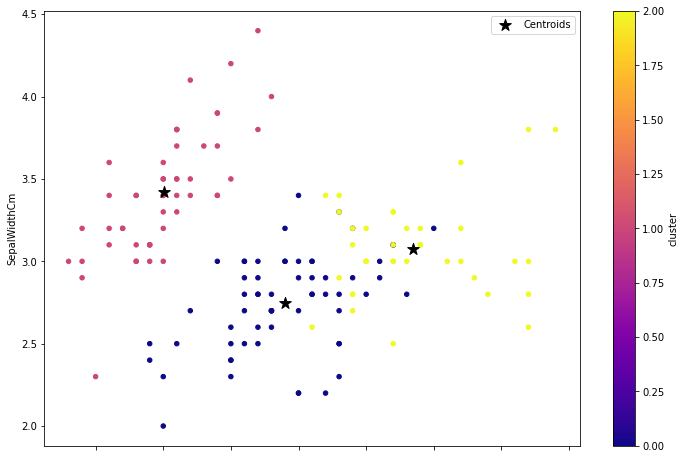

In [149]:
label_clust.plot.scatter(x='SepalLengthCm',y='SepalWidthCm', c='cluster', cmap='plasma', figsize=(12,8))
x = kmeans.cluster_centers_[:, 0]
y = kmeans.cluster_centers_[:,1]
plt.scatter(x,y, marker = '*', s=150, c='Black', label='Centroids')
plt.legend()

## Conclusion

**The model fitted to the data has a classification accuracy of 89.33%.**<br>